# **Libraries**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

# **Explanation**

In [ ]:
"""

x -> features : x_train , x_test
y_actual -> target : y_train , y_test
m -> number of samples (rows)

y_prediction -> target -> prediction value

w -> weight
b -> bias

Equation of linear regression : w * x + b

y_prediction = w * x + b

error = y_actual - y_prediction


cost_function :

  for each method we implement it on multiple rows (samples) of data using for loop

        1. MSE (Mean Squared Error)
                                    equation -> (error ** 2)
                                    cost function = (1 / 2m) * sum( (y_actual - y_prediction) ** 2 )


        2. MAE (Mean Absolute Error)
                                    equation -> abs(error)
                                    cost function = (1 / m) * sum( abs(y_actual - y_prediction) )


        3. RMSE (Root Mean Squared Error)
                                    equation -> sqrt( (error ** 2) )
                                    cost function = sqrt(  (1 / m) * sum( (y_actual - y_prediction) ** 2 ) )  )


        4. R2 (R-squared)
                                    equation -> 1 - (error / (y_actual - y_mean))
                                    y_mean = total_sum(y_actual) / m
                                    cost function = 1 - (  sum( (y_actual - y_prediction) ** 2 ) / sum( (y_actual - y_mean) ** 2 ) )  )


gradients computing :

  calculate derivate of cost function wrt w and b for each y_prediction value
  with w : multiple with x_train
  with b : multiple with 1
  do not forget the (1/m) to get the average

  for each method we implement it on multiple rows (samples) of data using for loop
  there is negative cuz -> error = y_actual - y_prediction = y_actual - (w * x + b) = y_actual - w * x - b
  and we diffrentiate wrt w and b

  derivative = sum( y_actual - y_prediction )

        1. without regularization
                                    dj_dw + = (-1 / m) * derivative * x_train
                                    dj_db + = (-1 / m) * derivative

        2. with regularization

              Regularization entirely solves the problem of overfitting, but λ is what determines the strength of this solution.
              It’s like a 'control knob' that makes the model either learn more details or stay simpler and generalize better.
              so the more lambda value is the less the model complex is.

              constant = (lambda_/(2*m))

                  1. l1 : lasso -> constant * sum( abs(weights) )
                      lambda_ makes the weights = 0   :->   feature selection
                                                regularization = constant * sum( abs(w) + abs(b) )
                                                dj_dw + = (-1 / m) * derivative * x_train + regularization
                                                dj_db + = (-1 / m) * derivative + regularization


                  2. l2 : ridge -> constant * sum( weights ** 2 )
                    lambda_ makes the weights very small   :->   shrinkage
                                                regularization = constant * sum(  ( w ** 2 ) + ( b ** 2 )  )
                                                dj_dw + = (-1 / m) * derivative * x_train + regularization
                                                dj_db + = (-1 / m) * derivative + regularization



updating the weights :

  we update the weights to try to get the minimum loss.
  but it is not enought to calculate the gradients only.
  we have to multiple it with learning_rate.
  learning rate determines the step size in the weight update.

  when choosing small value of learning rate , we increase the number of iterations , higher computational expensive.

  when choosing large value of learning rate , it may end with overshooting , the model go far away from the globel minimum
  do the model might not get the minimum cost loss at all!

  after choosing good value of learning_rate and multiple it with the gradients,
  we update the weights and biases.

  we subtract the gradients from the old weights and biases cuz :
    in the loss vs weights graph , we see that
    the model is in the left or the right side of the global minimum value

        - if the model is in the left side of global minimum value , dj_dw -> -ve , dj_db -> -ve
            so w_new > w_old : now the model will move right

        - if the model is in the right side of global minimum value , dj_dw -> +ve , dj_db -> +ve
            so w_new < w_old : now the model will move left

                          w_new = w_old - learning_rate * dj_dw
                          b_new = b_old - learning_rate * dj_db

"""


"\n\nx -> features : x_train , x_test\ny_actual -> target : y_train , y_test\nm -> number of samples (rows)\n\ny_prediction -> target -> prediction value\n\nw -> weight\nb -> bias\n\nEquation of linear regression : w * x + b\n\ny_prediction = w * x + b\n\nerror = y_actual - y_prediction\n\n\ncost_function :\n\n  for each method we implement it on multiple rows (samples) of data using for loop\n\n        1. MSE (Mean Squared Error)\n                                    equation -> (error ** 2)\n                                    cost function = (1 / 2m) * sum( (y_actual - y_prediction) ** 2 )\n\n\n        2. MAE (Mean Absolute Error)\n                                    equation -> abs(error)\n                                    cost function = (1 / m) * sum( abs(y_actual - y_prediction) )\n\n\n        3. RMSE (Root Mean Squared Error)\n                                    equation -> sqrt( (error ** 2) )\n                                    cost function = sqrt(  (1 / m) * sum( (y_actua

# **Manual Implementation**

In [12]:
def fun_linear_regression(x , w , b):
  if np.isscalar(w):
    Y_prediction = np.sum(w * x, axis=1) + b
  else:
    Y_prediction =  np.dot(x, w) + b

  return Y_prediction

In [18]:
def cost_function(Y_prediction , Y_train , m , fun_type = 'MSE'):
  total_cost = 0
  if fun_type == 'MSE':
    cost = (Y_prediction - Y_train) ** 2
    total_cost = total_cost + cost

    total_cost = total_cost * (1/(2*m))

  elif fun_type == 'MAE':
    cost = abs(Y_prediction - Y_train)
    total_cost = total_cost + cost

    total_cost = total_cost * (1/m)

  elif fun_type == 'RMSE':
    cost = (Y_prediction - Y_train) ** 2
    total_cost = total_cost + cost

    total_cost = np.sqrt(total_cost * (1/m))


  elif fun_type == 'r2':
    equation1_cost = 0
    equation2_mean = 0
    equation1_cost = equation1_cost + ((Y_prediction - Y_train) ** 2)
    equation2_mean = equation2_mean + ((Y_prediction - Y_train) ** 2)

    total_cost = 1 - (equation1_cost / equation2_mean)

  return total_cost

In [20]:
def regularization(w , b , m , lambda_ , reg_type = 'l1'):

  regularization_term = 0
  constant = (lambda_/(2*m))

  if reg_type == 'l1':
    weights = abs(w)  + abs(b)
  elif reg_type == 'l2':
    weights = (w**2 + b**2)
  else:
    raise ValueError("Invalid regularization type. Use 'l1' or 'l2'.")

    regularization_term = regularization_term + weights

  regularization_term = constant * regularization_term

  return regularization_term

In [24]:
def gradient_computing(Y_prediction , Y_train , X_train , m , w = None , b = None , with_or_without_reg = 'without' , lambda_ = None):
  dj_dw = 0
  dj_db = 0
  error = (Y_train - Y_prediction)

  dj_dw = (-1 * np.sum(np.dot(X_train.T, error)))
  dj_db = (-1 * np.sum(error))

  dj_dw = dj_dw * (1/m)
  dj_db = dj_db * (1/m)


  if with_or_without_reg == 'with-l1':
    regularization_term = regularization(w , b , m , lambda_ , 'l1')

    dj_dw = dj_dw + regularization_term
    dj_db = dj_db + regularization_term


  elif  with_or_without_reg == 'with-l2':
    regularization_term = regularization(w , b , m , lambda_ , 'l2')

    dj_dw = dj_dw + regularization_term
    dj_db = dj_db + regularization_term

  return dj_dw , dj_db

In [26]:
def update(w , b , alpha , dj_dw , dj_db):
  w_new = w - alpha * dj_dw
  b_new = b - alpha * dj_db

  return w_new , b_new

In [28]:
def model(X_train , Y_train , w , b , alpha , cost_function_type , iter):
  j_history = []
  w_history = []
  b_history = []
  m = X_train.shape[0]
  for i in range(iter):

    Y_prediction = fun_linear_regression(X_train , w , b)

    total_cost = cost_function(Y_prediction , Y_train , m , cost_function_type)
    j_history.append(total_cost)

    dj_dw , dj_db = gradient_computing(Y_prediction , Y_train , X_train , m , w = None , b = None , with_or_without_reg = 'without' , lambda_ = None)

    w , b = update(w , b , alpha , dj_dw , dj_db)
    w_history.append(w)
    b_history.append(b)

  print('without regularization')
  print(f'iteration {iter}: Total cost = {total_cost}, w = {w}, b = {b}' , end='\n\n')

  print(end = '\n\n\n')

  return w , b , j_history , w_history , b_history

In [29]:
def model_l1(X_train , Y_train , w , b , alpha , cost_function_type , lambda_ , iter):
  j_history = []
  w_history = []
  b_history = []
  m = X_train.shape[0]
  for i in range(iter):

    Y_prediction = fun_linear_regression(X_train , w , b)

    total_cost = cost_function(Y_prediction , Y_train , m , cost_function_type)
    j_history.append(total_cost)

    dj_dw , dj_db = gradient_computing(Y_prediction , Y_train , X_train , m , w = w , b = b , with_or_without_reg = 'with-l1' , lambda_ = lambda_)

    w , b = update(w , b , alpha , dj_dw , dj_db)
    w_history.append(w)
    b_history.append(b)

  print('with lasso regularization')
  print(f'iteration {iter}: Total cost = {total_cost}, w = {w}, b = {b}' , end='\n\n')

  print(end = '\n\n\n')

  return w , b , j_history , w_history , b_history

In [30]:
def model_l2(X_train , Y_train , w , b , alpha , cost_function_type , lambda_ , iter):
  j_history = []
  w_history = []
  b_history = []
  m = X_train.shape[0]
  for i in range(iter):

    Y_prediction = fun_linear_regression(X_train , w , b)

    total_cost = cost_function(Y_prediction , Y_train , m , cost_function_type)
    j_history.append(total_cost)

    dj_dw , dj_db = gradient_computing(Y_prediction , Y_train , X_train , m , w = w , b = b , with_or_without_reg = 'with-l2' , lambda_ = lambda_)

    w , b = update(w , b , alpha , dj_dw , dj_db)
    w_history.append(w)
    b_history.append(b)

  print('with ridge regularization')
  print(f'iteration {iter}: Total cost = {total_cost}, w = {w}, b = {b}' , end='\n\n')

  print(end = '\n\n\n')

  return w , b , j_history , w_history , b_history

# **Example**

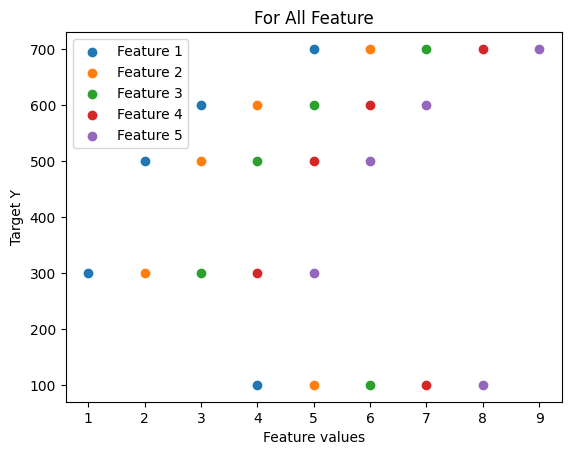

In [41]:
X_train = np.array([
                    [1,2,3,4,5],
                    [2,3,4,5,6],
                    [3,4,5,6,7],
                    [4,5,6,7,8],
                    [5,6,7,8,9]
                    ])

Y_train = np.array([300, 500 , 600 , 100 , 700])

for i in range(X_train.shape[1]):
  plt.scatter(X_train[:, i], Y_train, label=f'Feature {i+1}')
plt.title("For All Feature")
plt.xlabel("Feature values")
plt.ylabel("Target Y")
plt.legend()
plt.show()

# print(f'shape of X_train and Y_train: {X_train.shape}')
# plt.scatter(X_train, Y_train)
# plt.plot(X_train, Y_train, c = "r")
# plt.show()

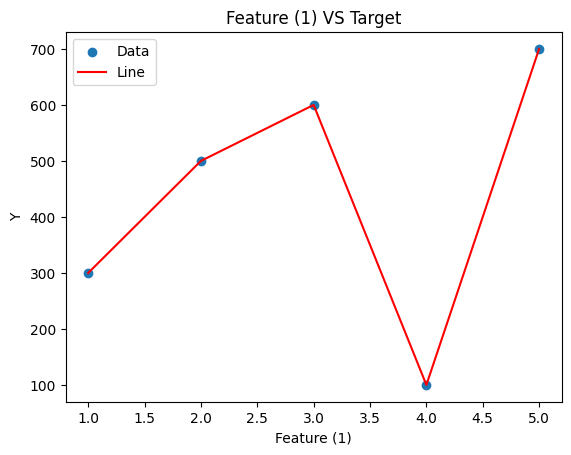

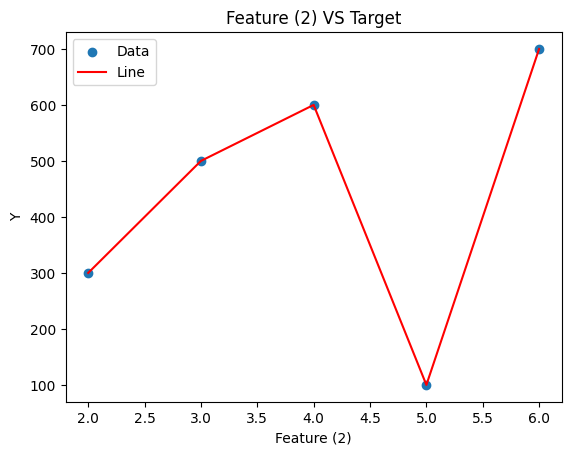

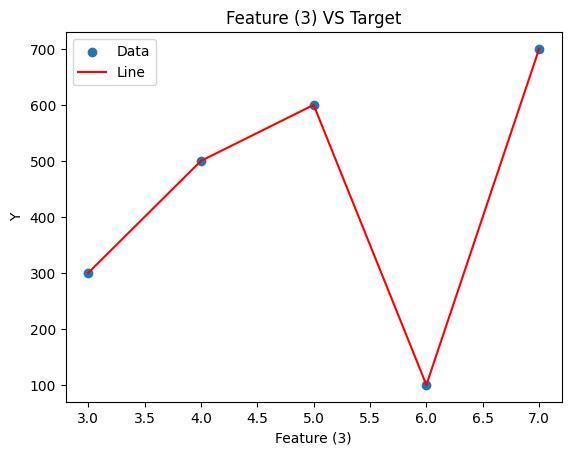

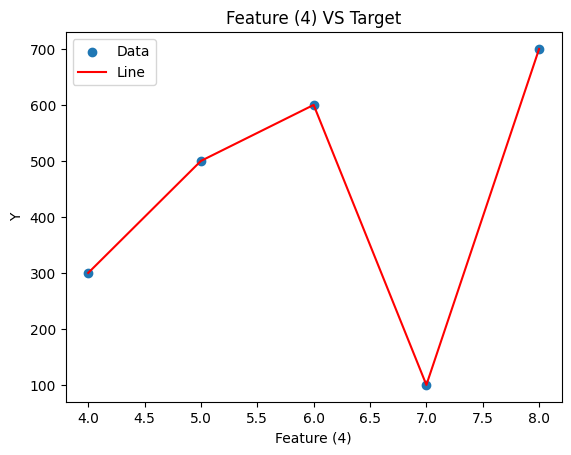

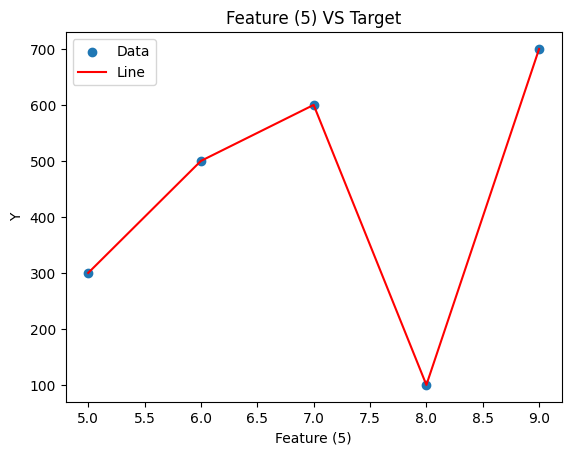

In [42]:
for i in (range(X_train.shape[1])):
  plt.scatter(X_train[:,i], Y_train, label="Data")
  plt.plot(X_train[:,i], Y_train, c="r", label="Line")
  plt.title(f"Feature ({i + 1}) VS Target")
  plt.xlabel(f"Feature ({i + 1})")
  plt.ylabel("Y")
  plt.legend()
  plt.show()

[0 0 0 0 0]


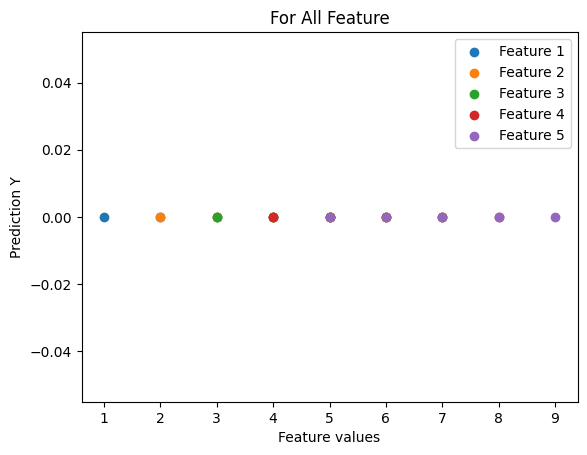

In [43]:
m = m = X_train.shape[0] # number of samples
Y_prediction = np.zeros(X_train.shape) # target -> prediction value

w = 0 # weight
b = 0 # bias
Y_prediction = fun_linear_regression(X_train, w, b)

print(Y_prediction)

for i in range(X_train.shape[1]):
  plt.scatter(X_train[:, i], Y_prediction, label=f'Feature {i+1}')
plt.title("For All Feature")
plt.xlabel("Feature values")
plt.ylabel("Prediction Y")
plt.legend()
plt.show()

# plt.scatter(X_train, Y_train)
# plt.plot(X_train, Y_prediction, c = "r")
# plt.show()

In [44]:
total_cost_mse = cost_function(Y_prediction , Y_train , m , 'MSE')
print('MSE = ' + str(total_cost_mse) , end = '\n\n')

total_cost_mae = cost_function(Y_prediction , Y_train , m , 'MAE')
print('MAE = ' + str(total_cost_mae) , end= '\n\n')

total_cost_rmse = cost_function(Y_prediction , Y_train , m , 'RMSE')
print('RMSE = ' + str(total_cost_rmse) , end = '\n\n')

total_cost_r2 = cost_function(Y_prediction , Y_train , m , 'r2')
print('R2 = ' + str(total_cost_r2) , end = '\n\n')

MSE = [ 9000. 25000. 36000.  1000. 49000.]

MAE = [ 60. 100. 120.  20. 140.]

RMSE = [134.16407865 223.60679775 268.3281573   44.72135955 313.04951685]

R2 = [0. 0. 0. 0. 0.]



In [45]:
regularization_term_l1 = regularization(w , b , m , 0.01 , 'l1')
print(f"Regularization Term: {regularization_term_l1}")

regularization_term_l2 = regularization(w , b , m , 0.01 , 'l2')
print(f"Regularization Term: {regularization_term_l2}")

Regularization Term: 0.0
Regularization Term: 0.0


In [46]:
dj_dw , dj_db = gradient_computing(Y_prediction , Y_train , X_train , m)
print(f"Derivative of cost function for w: {dj_dw}")
print(f"Derivative of cost function for b: {dj_db}" , end = '\n\n')

dj_dw_l1 , dj_db_l1 = gradient_computing(Y_prediction , Y_train , X_train , m , w , b , 'with-l1' , 0.01)
print(f"Derivative of cost function for w: {dj_dw_l1}")
print(f"Derivative of cost function for b: {dj_db_l1}" , end = '\n\n')

dj_dw_l2 , dj_db_l2 = gradient_computing(Y_prediction , Y_train , X_train , m , w , b , 'with-l2' , 0.01)
print(f"Derivative of cost function for w: {dj_dw_l2}")
print(f"Derivative of cost function for b: {dj_db_l2}" , end = '\n\n')

Derivative of cost function for w: -11400.0
Derivative of cost function for b: -440.0

Derivative of cost function for w: -11400.0
Derivative of cost function for b: -440.0

Derivative of cost function for w: -11400.0
Derivative of cost function for b: -440.0



In [47]:
print(f"new w , b: {update(w , b , 0.01 , dj_dw , dj_db)}" )

new w , b: (np.float64(114.0), np.float64(4.4))


# **Task**